## Question

Act as a data analyst. I have a csv file with four columns of data describing a day's weather. The name of the file is "OAW.csv". The first column contains the date in ISO 8601 format. The second column contains the precipitation. The third column contains the maximum temperature. The fourth column contains the minimum temperature. The variable names describing the contents of the four columns are in the first row. They are DATE, PRCP, TMAX, and TMIN.  Create a python program to calculate the mean value of PRCP, TMAX, and TMIN for February 29. Use pandas.

In [1]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("OAW.csv")

# Convert the DATE column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Filter the DataFrame to include only data for February 23
feb_23_data = df[df['DATE'].dt.month == 2][df['DATE'].dt.day == 23]

# Calculate the mean value of PRCP, TMAX, and TMIN for February 23
mean_prcp = feb_23_data['PRCP'].mean()
mean_tmax = feb_23_data['TMAX'].mean()
mean_tmin = feb_23_data['TMIN'].mean()

# Print the results
print("Mean Precipitation (PRCP) for February 23:", mean_prcp)
print("Mean Maximum Temperature (TMAX) for February 23:", mean_tmax)
print("Mean Minimum Temperature (TMIN) for February 23:", mean_tmin)


Mean Precipitation (PRCP) for February 23: 0.19839506172839508
Mean Maximum Temperature (TMAX) for February 23: 50.01234567901235
Mean Minimum Temperature (TMIN) for February 23: 32.135802469135804


/var/folders/28/v2mg186j7k36l410s9bzf9nc0000gn/T/ipykernel_45670/3062699881.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  feb_23_data = df[df['DATE'].dt.month == 2][df['DATE'].dt.day == 23]


## Question

Write a function which could accept any string in the form "Month day" and produce the same result for that month and day.

In [2]:
import pandas as pd

def calculate_weather_mean(month_day, file_path):
    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Convert the DATE column to datetime format
    df['DATE'] = pd.to_datetime(df['DATE'])

    # Extract month and day from the input string
    month, day = month_day.split()
    month_num = pd.to_datetime(month, format='%B').month  # Convert month name to its numerical representation

    # Filter the DataFrame to include only data for the specified month and day
    specific_date_data = df[(df['DATE'].dt.month == month_num) & (df['DATE'].dt.day == int(day))]

    # Calculate the mean value of PRCP, TMAX, and TMIN for the specified date
    mean_prcp = specific_date_data['PRCP'].mean()
    mean_tmax = specific_date_data['TMAX'].mean()
    mean_tmin = specific_date_data['TMIN'].mean()

    return mean_prcp, mean_tmax, mean_tmin

# Example usage:
month_day = "February 23"
file_path = "OAW.csv"
mean_prcp, mean_tmax, mean_tmin = calculate_weather_mean(month_day, file_path)
print(f"Mean Precipitation (PRCP) for {month_day}: {mean_prcp}")
print(f"Mean Maximum Temperature (TMAX) for {month_day}: {mean_tmax}")
print(f"Mean Minimum Temperature (TMIN) for {month_day}: {mean_tmin}")


Mean Precipitation (PRCP) for February 23: 0.19839506172839508
Mean Maximum Temperature (TMAX) for February 23: 50.01234567901235
Mean Minimum Temperature (TMIN) for February 23: 32.135802469135804


## Question

Produce a graph showing how the mean value of TMAX varies by month. Use matplotlib.

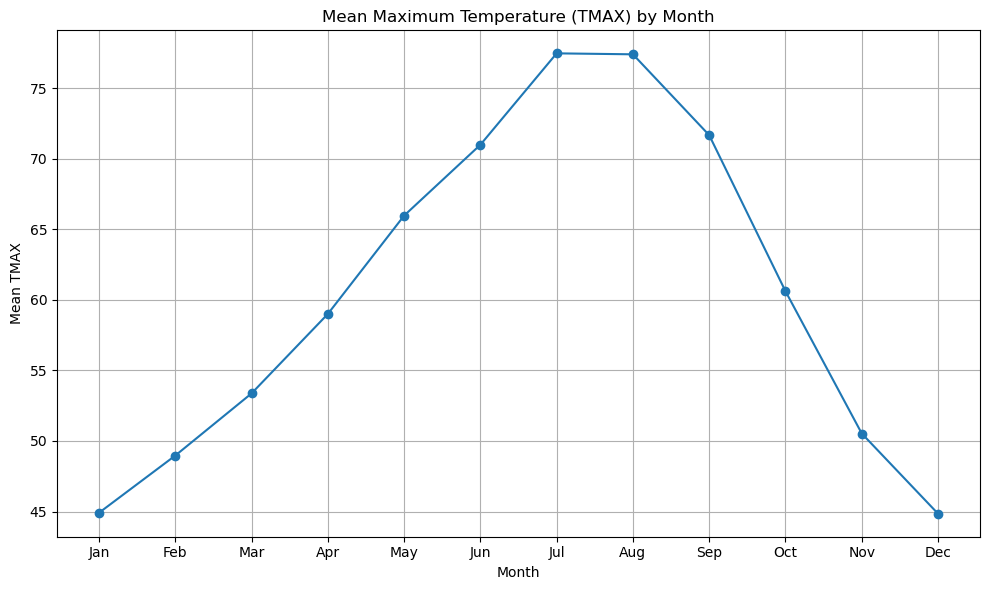

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("OAW.csv")

# Convert the DATE column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Extract month from the DATE column
df['Month'] = df['DATE'].dt.month

# Calculate the mean value of TMAX for each month
mean_tmax_by_month = df.groupby('Month')['TMAX'].mean()

# Define the months as labels for the x-axis
months_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(months_labels, mean_tmax_by_month, marker='o', linestyle='-')
plt.title('Mean Maximum Temperature (TMAX) by Month')
plt.xlabel('Month')
plt.ylabel('Mean TMAX')
plt.grid(True)
plt.xticks(months_labels)  # Set the x-axis labels to be the month names
plt.tight_layout()

# Display the graph
plt.show()


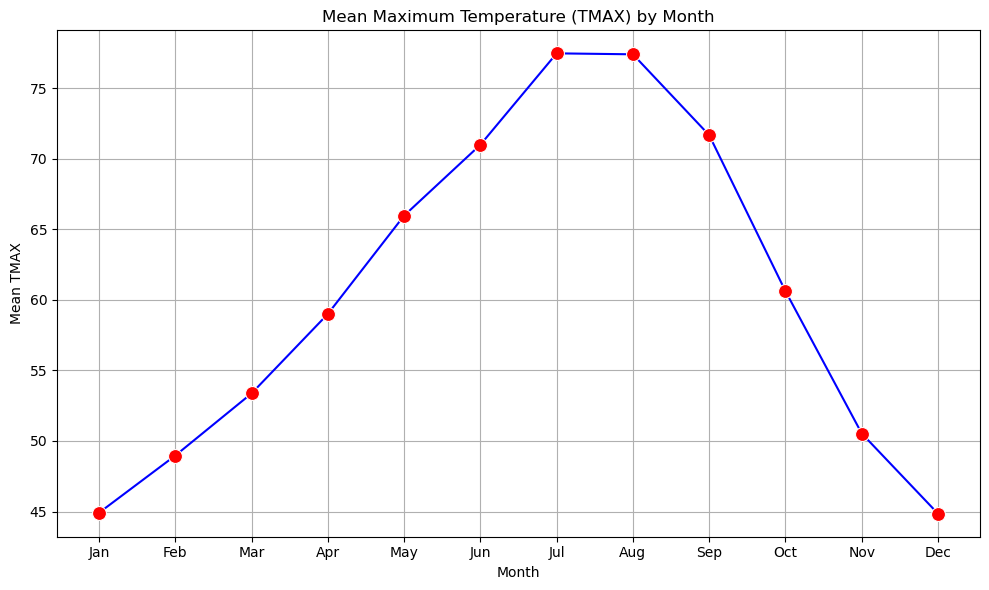

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("OAW.csv")

# Convert the DATE column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Extract month from the DATE column
df['Month'] = df['DATE'].dt.month

# Calculate the mean value of TMAX for each month
mean_tmax_by_month = df.groupby('Month')['TMAX'].mean().reset_index()

# Define the months as labels for the x-axis
months_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plotting the graph using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_tmax_by_month, x='Month', y='TMAX', marker='o', color='blue', markersize=10, markerfacecolor='red')
plt.title('Mean Maximum Temperature (TMAX) by Month')
plt.xlabel('Month')
plt.ylabel('Mean TMAX')
plt.xticks(range(1, 13), months_labels)  # Set the x-axis labels to be the month names
plt.grid(True)
plt.tight_layout()

# Display the graph
plt.show()


## Question

Produce a graphic using matplotlib showing the histograms of TMAX values for each month. Use facetting to display the months. Make the scale on the horizontal axis of each month identical.

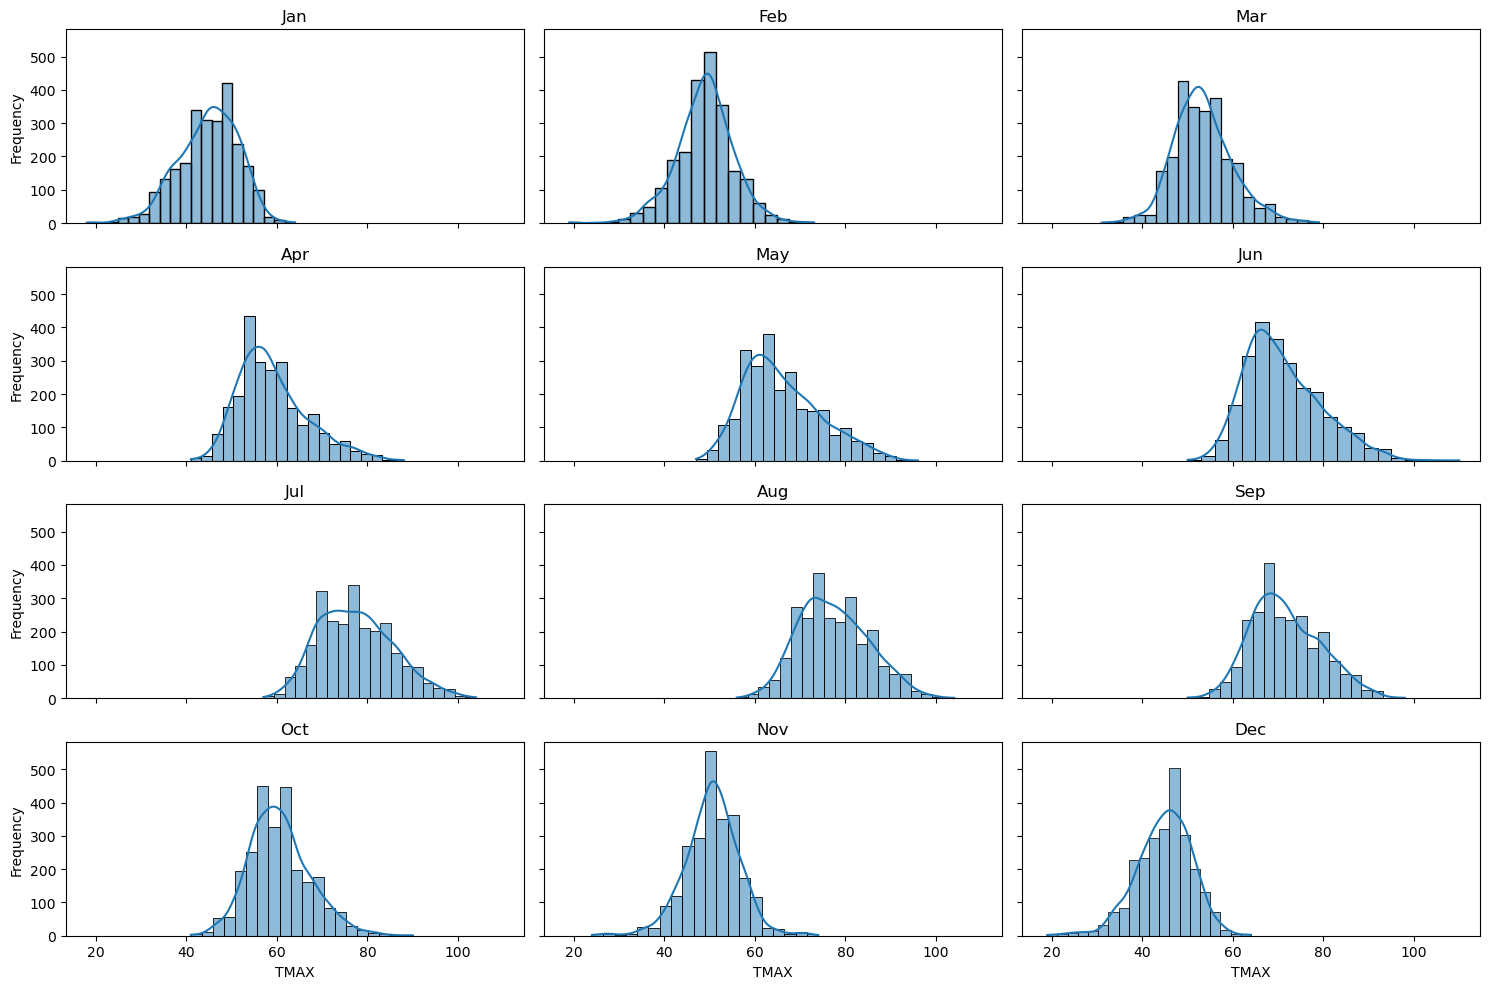

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("OAW.csv")

# Convert the DATE column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Extract month from the DATE column
df['Month'] = df['DATE'].dt.month

# Define the months as labels for the x-axis
months_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create subplots for each month
fig, axes = plt.subplots(4, 3, figsize=(15, 10), sharex=True, sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for TMAX values for each month
for month in range(1, 13):
    ax = axes[month - 1]
    sns.histplot(data=df[df['Month'] == month], x='TMAX', ax=ax, bins=20, kde=True)
    ax.set_title(months_labels[month - 1])  # Set title with month name
    ax.set_xlabel('TMAX')  # Set x-axis label
    ax.set_ylabel('Frequency')  # Set y-axis label

# Adjust layout
plt.tight_layout()

# Display the graph
plt.show()


## Question

I consider a day reasonable if the maximum temperature is above 50 an there is no rain. Produce a plot with the month on the horizontal axis and the probability that an arbitrary day in the month will be reasonable on the vertical axis. Make the dot large enough to see clearly.

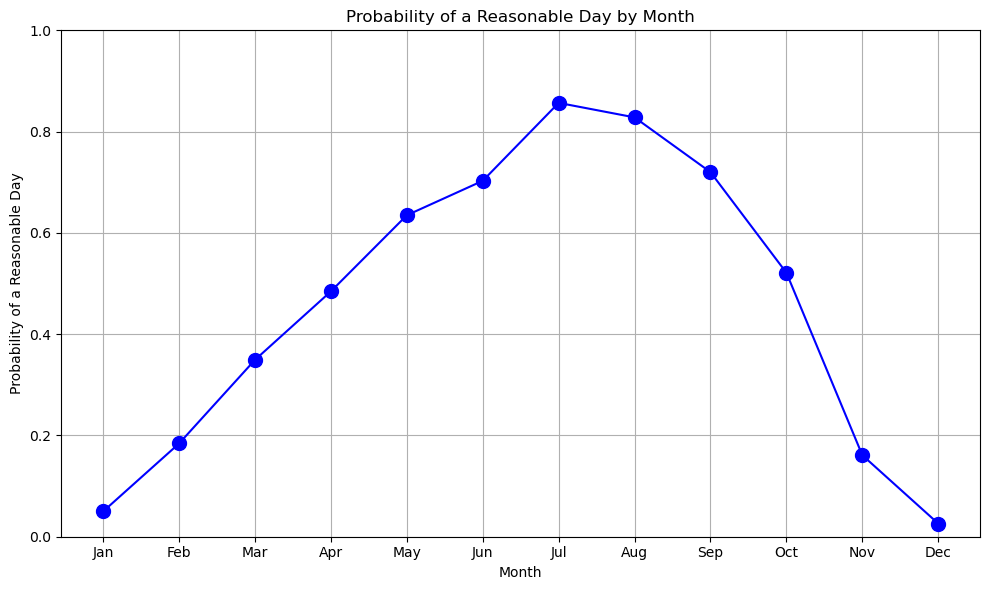

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("OAW.csv")

# Convert the DATE column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Extract month and check if the conditions for a reasonable day are met
df['Reasonable'] = (df['TMAX'] > 50) & (df['PRCP'] == 0)

# Group by month and calculate the probability of a reasonable day
prob_reasonable_by_month = df.groupby(df['DATE'].dt.month)['Reasonable'].mean()

# Define the months as labels for the x-axis
months_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(months_labels, prob_reasonable_by_month, marker='o', markersize=10, color='blue')
plt.title('Probability of a Reasonable Day by Month')
plt.xlabel('Month')
plt.ylabel('Probability of a Reasonable Day')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.grid(True)
plt.tight_layout()

# Display the graph
plt.show()


## Question

Please make the actual value of the probability visible.

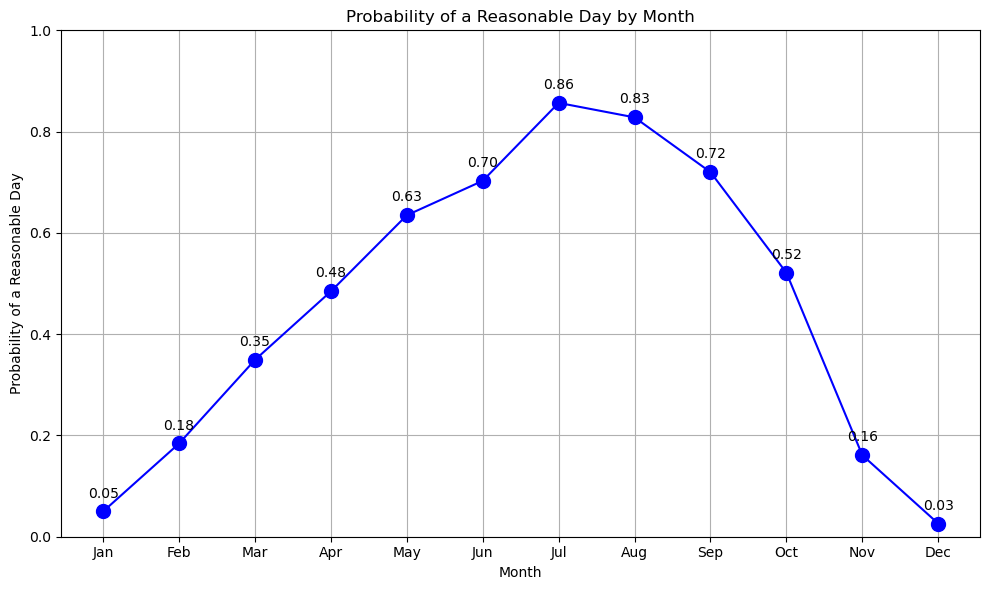

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("OAW.csv")

# Convert the DATE column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Extract month and check if the conditions for a reasonable day are met
df['Reasonable'] = (df['TMAX'] > 50) & (df['PRCP'] == 0)

# Group by month and calculate the probability of a reasonable day
prob_reasonable_by_month = df.groupby(df['DATE'].dt.month)['Reasonable'].mean()

# Define the months as labels for the x-axis
months_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(months_labels, prob_reasonable_by_month, marker='o', markersize=10, color='blue')

# Annotate each point with its probability value
for i, prob in enumerate(prob_reasonable_by_month):
    plt.annotate(f'{prob:.2f}', (months_labels[i], prob), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Probability of a Reasonable Day by Month')
plt.xlabel('Month')
plt.ylabel('Probability of a Reasonable Day')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.grid(True)
plt.tight_layout()

# Display the graph
plt.show()
